In [1]:
## todo
# README.md
# optimizer : learning rate scheduler
# layer : rnn, batch normalization
# analysis : validation error
# fit : callbacks

# tf -> custom calcuration program

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import k.Activations.functions as Activations
import k.Layers.functions as Layers
import k.Losses.functions as Losses
import k.Optimizers.functions as Optimizers
import k.Networks.functions as Networks

2024-04-17 15:03:40.403574: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [4]:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# x_train = x_train.reshape(x_train.shape + (1,))[0:1000]
# y_train = y_train.reshape(y_train.shape + (1,))[0:1000]
# x_test = x_test.reshape(x_test.shape + (1,))[0:100]
# y_test = y_test.reshape(y_test.shape + (1,))[0:100]

# x_train = np.divide(x_train, 255)
# x_test = np.divide(x_test, 255)
# y_train = tf.keras.utils.to_categorical(y_train, 10)
# y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
x_train = np.random.normal(loc=0.0, scale=1.0, size=(100, 15, 15, 1))
x_test = np.random.normal(loc=0.0, scale=1.0, size=(10, 15, 15, 1))
y_train = np.random.randint(0, 10, size=(100, 10))
y_test = np.random.randint(0, 10, size=(10, 10))

In [6]:
model = Networks.Neural_network()
model.network.append(Layers.Convolution2D(input_shape=x_train.shape[1::], filters=128, kernel_shape=(3, 3)))
model.network.append(Activations.ReLU())
model.network.append(Layers.Pooling2D(pool_type='max'))
model.network.append(Layers.Convolution2D(filters=64, kernel_shape=(2, 2)))
model.network.append(Activations.ReLU())
model.network.append(Layers.Flatten())
model.network.append(Layers.Dense(output_shape=32))
model.network.append(Activations.ReLU())
model.network.append(Layers.Dense(output_shape=10))
model.network.append(Activations.Softmax())

optimizer = Optimizers.Adam(learning_rate=1e-4)
model.compile('cce', optimizer, metrics='mae')

2024-04-17 15:03:43.377960: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.evaluate(x_test, y_test)

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=76.34045>, 'metrics': []}

In [8]:
hist = model.fit(x_train, y_train, batch_size=256, epochs=10, verbose=1, validation_data=(x_test, y_test))

epoch: 01  | loss : 66.0960  | val_loss : 70.4103  | metrics : 4.2103
epoch: 02  | loss : 63.9960  | val_loss : 65.8657  | metrics : 4.3044
epoch: 03  | loss : 61.5220  | val_loss : 55.6092  | metrics : 4.3020
epoch: 04  | loss : 54.6576  | val_loss : 56.5551  | metrics : 4.2745
epoch: 05  | loss : 56.4006  | val_loss : 59.9317  | metrics : 4.5497
epoch: 06  | loss : 53.2492  | val_loss : 59.4326  | metrics : 4.2381
epoch: 07  | loss : 53.0963  | val_loss : 56.7270  | metrics : 4.2731
epoch: 08  | loss : 49.2910  | val_loss : 53.4231  | metrics : 4.2538
epoch: 09  | loss : 44.9988  | val_loss : 49.5298  | metrics : 4.2563
epoch: 10  | loss : 44.3898  | val_loss : 45.5560  | metrics : 4.4305


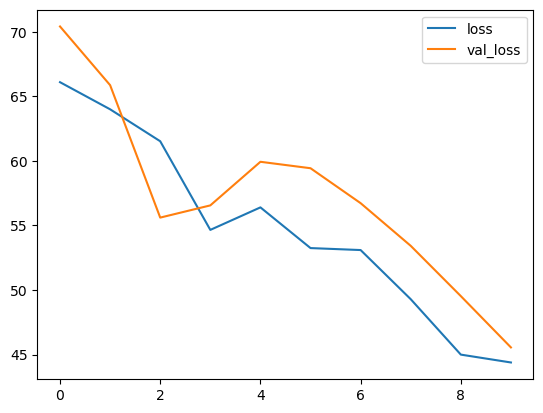

In [9]:
plt.plot(hist['loss'], label='loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [10]:
model.evaluate(x_test, y_test)

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=45.556034>, 'metrics': []}

### make tensorflow model to compare

In [11]:
tf_model = tf.keras.Sequential()
tf_model.add(tf.keras.layers.Conv2D(128, input_shape=x_train.shape[1::], kernel_size=3, activation='relu'))
tf_model.add(tf.keras.layers.MaxPooling2D())
tf_model.add(tf.keras.layers.Conv2D(64, kernel_size=2, activation='relu'))
tf_model.add(tf.keras.layers.Flatten())
tf_model.add(tf.keras.layers.Dense(32, activation='relu'))
tf_model.add(tf.keras.layers.Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
tf_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['mae'])

In [12]:
tf_model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 231ms/step - loss: 110.8125 - mae: 4.7031


[110.8125, 4.703092098236084]

In [13]:
tf_hist = tf_model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 103.3750 - mae: 4.3528 - val_loss: 110.8125 - val_mae: 4.7031
Epoch 2/10
1/1 [==============================] - 0s 398ms/step - loss: 103.1875 - mae: 4.3528 - val_loss: 110.8125 - val_mae: 4.7031
Epoch 3/10
1/1 [==============================] - 0s 396ms/step - loss: 103.4375 - mae: 4.3528 - val_loss: 110.8125 - val_mae: 4.7032
Epoch 4/10
1/1 [==============================] - 0s 396ms/step - loss: 103.2500 - mae: 4.3528 - val_loss: 110.8750 - val_mae: 4.7034
Epoch 5/10
1/1 [==============================] - 0s 396ms/step - loss: 103.2500 - mae: 4.3529 - val_loss: 111.0000 - val_mae: 4.7035
Epoch 6/10
1/1 [==============================] - 0s 396ms/step - loss: 103.1250 - mae: 4.3529 - val_loss: 111.1250 - val_mae: 4.7036
Epoch 7/10
1/1 [==============================] - 0s 405ms/step - loss: 103.6875 - mae: 4.3529 - val_loss: 111.3125 - val_mae: 4.7038
Epoch 8/10
1/1 [==============================] - 0s 397ms/step -

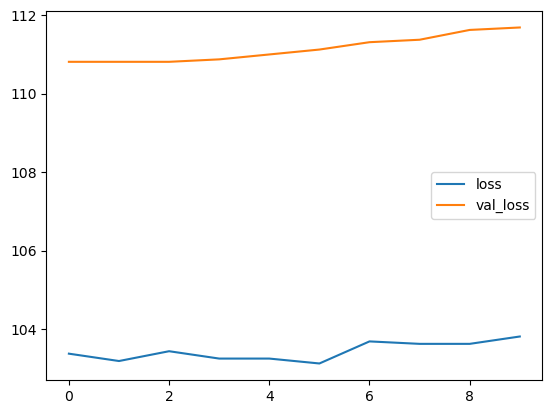

In [14]:
plt.plot(tf_hist.history['loss'], label='loss')
plt.plot(tf_hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [15]:
tf_model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 28ms/step - loss: 111.6875 - mae: 4.7042


[111.6875, 4.704154014587402]